# Data Import and Preprocessing

In [96]:
# All imports, setup logging and get configuration file

from utils import get_configuration_file, setup_logging
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

setup_logging()
config = get_configuration_file()

In [80]:
# Importing data

holiday_events = pd.read_csv(config["holiday_events_data_location"])
oil = pd.read_csv(config["oil_data_location"])
sample_submission = pd.read_csv(config["sample_submission_data_location"])
stores = pd.read_csv(config["stores_data_location"])
test = pd.read_csv(config["test_data_location"])
train = pd.read_csv(config["train_data_location"])
transactions = pd.read_csv(config["transactions_data_location"])

In [81]:
# Add holiday column in holiday_events file and rename columns

stores.rename(columns={"type":"store_type"}, inplace = True)
holiday_events.rename(columns={"type":"holiday_type"}, inplace = True)
holiday_events["holiday"] = np.where((holiday_events["holiday_type"].
                                      isin(["Holiday","Transfer","Event",
                                           "Bridge","Additional"]) &
                                     (holiday_events["transferred"]==False)),1,0)
holiday_events_national = holiday_events[holiday_events["locale"]=="National"]

In [83]:
# Merging data

training_dataset = train.merge(stores, on = "store_nbr", how = "inner")
training_dataset = training_dataset.merge(oil, on = "date", how = "left")

training_dataset_temp = training_dataset.merge(holiday_events[["date","locale_name",
                                                               "holiday"]], how = "left",
                                                                right_on = 
                                                                ["date","locale_name"], 
                                                                left_on = ["date","city"])
training_dataset_temp.rename(columns={"holiday":"local_holiday"},inplace=True)
training_dataset_temp.drop(columns="locale_name",inplace=True)

training_dataset_temp = training_dataset_temp.merge(holiday_events_national
                                                    [["date","holiday"]],how = "left", 
                                                    left_on = "date", right_on = "date")
training_dataset_temp.rename(columns={"holiday":"national_holiday"},inplace=True)

training_dataset_temp.fillna({"local_holiday":0,"national_holiday":0},inplace = True)

training_dataset = training_dataset_temp

training_dataset

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico,local_holiday,national_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,0.0,1.0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,0.0,1.0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,0.0,1.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,0.0,1.0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,0.0,0.0
3008276,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,0.0,0.0
3008277,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,0.0,0.0
3008278,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,0.0,0.0


# Data Visualization

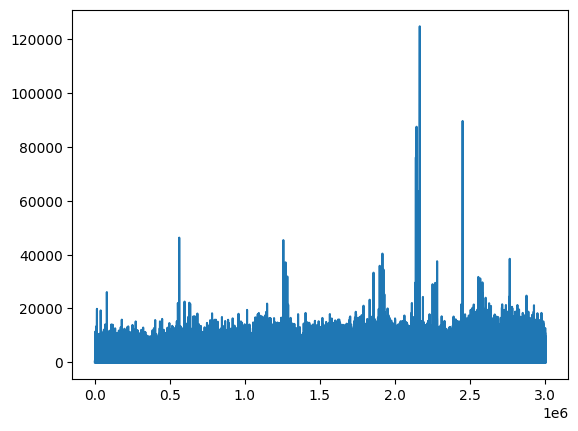

In [94]:
plt.plot(training_dataset["sales"])

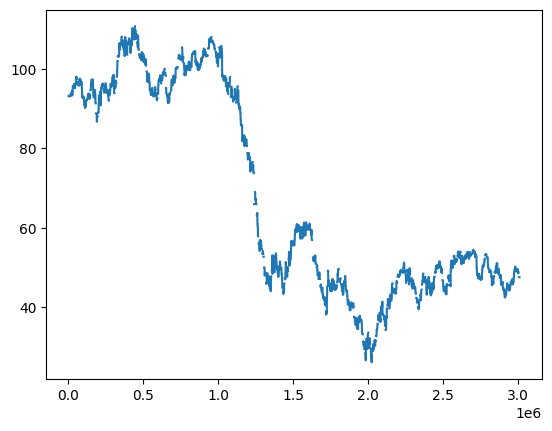

In [95]:

plt.plot(training_dataset["dcoilwtico"])